In [ ]:
%pip install matplotlib
%pip install ipympl

## Import Module

In [45]:
from importlib import reload
import MLRegressions as lg
reload(lg)

<module 'MLRegressions' from 'c:\\Users\\cborg\\OneDrive - Microsoft\\40 - Persönlich\\Project Darwin\\ML Implementations\\MLRegressions.py'>

## Generate Demo Data and Plot it, if it is one or two dimensional

(<Axes3DSubplot:>, <Figure size 432x288 with 1 Axes>)

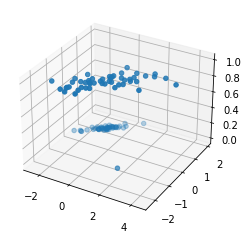

In [46]:
from matplotlib import pyplot as plt
%matplotlib inline

#Feature Dimensions
dimensions = 2
numberOfSamples = 100

X,Y = lg.getLogisticRegressionDemoData(numberOfSamples, dimensions)

lg.plotData(X,Y)


## Min Max Scaling of Data

(<Axes3DSubplot:>, <Figure size 432x288 with 1 Axes>)

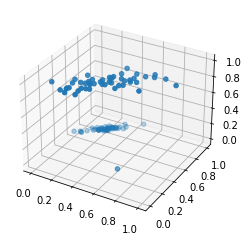

In [47]:
X = lg.scaleData(X)
Y = lg.scaleData(Y)

lg.plotData(X,Y)

## Run the Logistic Regression

In [48]:
learningRate = 0.1
iterations = 10000

weigths, c = lg.runLogisticRegression(X, Y, learningRate, iterations)

## Test Results

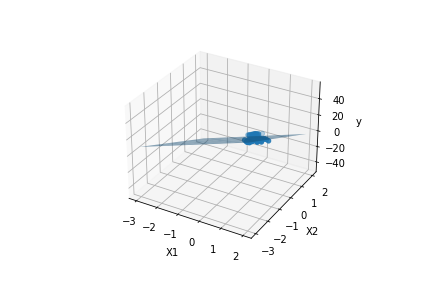

In [49]:
%matplotlib widget
lg.plotResults(X, Y, weigths, c)

## Predict data with the trained classifier

In [50]:
n = len(X)
dimensions = X.shape[1]

YPredClass = []

for i in range(0, n):
    currentValue = 0
    for dim in range(0, dimensions):
        currentValue = currentValue + X[i][dim] * weigths[dim]
    currentValue += c

    if currentValue > 0.5:
        YPredClass.append(1)
    else:
        YPredClass.append(0)
        

## Evaluate Confusion Matrix

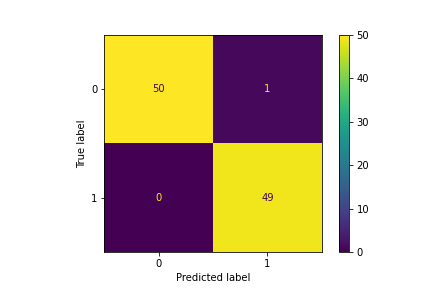

In [51]:
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confMatrix = confusion_matrix(Y, YPredClass)

cm_display = ConfusionMatrixDisplay(confMatrix).plot(values_format='d')